# Evaluating Result

### Import libraries

In [36]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
# Importing files
dm=pd.read_csv('democrat_Sentiment.csv')   
rp=pd.read_csv('republican_Sentiment.csv')

In [38]:
dm.sample(5)

,Tweets,Sentiment
4177,top huge announcement fuming via,1
4814,fraud reason would difference,0
4713,year old right,1
443,covid pandemic rightly vast majority ca also l...,-1
239,longer clear precisely plan economy,1


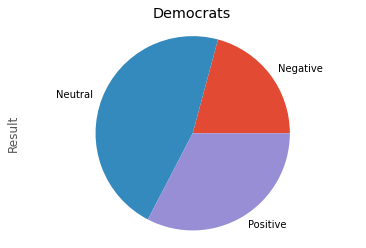

In [39]:
# Sentiment for Democrats
pos_abt_dm=(len(dm[dm['Sentiment']==1])/dm.shape[0])*100
neg_abt_dm=(len(dm[dm['Sentiment']==-1])/dm.shape[0])*100
ntrl_abt_dm=(len(dm[dm['Sentiment']==0])/dm.shape[0])*100
pos_abt_dm,neg_abt_dm,ntrl_abt_dm
df = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Result': [pos_abt_dm,neg_abt_dm,ntrl_abt_dm]})
df.Result.groupby(df.Sentiment).sum().plot(kind='pie',title='Democrats')
plt.axis('equal')
plt.show()

### 32% positive, 20% negative and 46% Neutral about Democrats

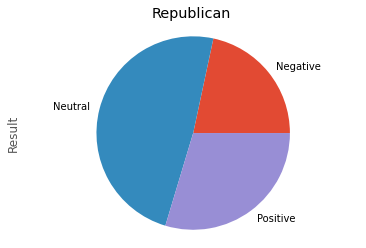

In [40]:
# Sentiment for Republican
pos_abt_rp=(len(rp[rp['Sentiment']==1])/rp.shape[0])*100
neg_abt_rp=(len(rp[rp['Sentiment']==-1])/rp.shape[0])*100
ntrl_abt_rp=(len(rp[rp['Sentiment']==0])/rp.shape[0])*100
pos_abt_rp,neg_abt_rp,ntrl_abt_rp
df = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Result': [pos_abt_rp,neg_abt_rp,ntrl_abt_rp]})
df.Result.groupby(df.Sentiment).sum().plot(kind='pie',title='Republican')
plt.axis('equal')
plt.show()

### 29% positive, 21% negative and 48% Neutral about Republican.  This shows, upcoming election is challenging for current president. So, Trump, Biden in neck-and-neck race.

In [41]:
ttl_pos=((len(rp[rp['Sentiment']==1]))+len(rp[rp['Sentiment']==1]))/(dm.shape[0]+rp.shape[0])*100
ttl_neg=((len(rp[rp['Sentiment']==-1]))+len(rp[rp['Sentiment']==-1]))/(dm.shape[0]+rp.shape[0])*100
ttl_ntrl=((len(rp[rp['Sentiment']==0]))+len(rp[rp['Sentiment']==0]))/(dm.shape[0]+rp.shape[0])*100
ttl_pos,ttl_neg,ttl_ntrl

(29.48528688121248, 21.533313650231275, 48.44011416199193)

**So much negativity toward politics!**

Text(0.5, 0, 'Tweet Analysis Results in Percentage')

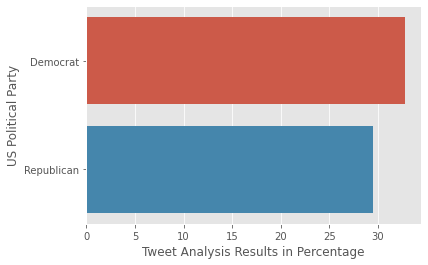

In [55]:
# Coverting to percentage
rp_prcnt=(len(rp[rp['Sentiment']==1])/((dm.shape[0]+rp.shape[0])/2))*100
dm_prcnt=(len(dm[dm['Sentiment']==1])/((dm.shape[0]+rp.shape[0])/2))*100
dm_prcnt,rp_prcnt
df = pd.DataFrame({
    'US Political Party': ['Democrat','Republican'],
    'Result': [dm_prcnt,rp_prcnt]})
ax = sns.barplot(x='Result', y='US Political Party', data=df)
ax.set_xlabel('Tweet Analysis Results in Percentage')

In [54]:
dm_prcnt,rp_prcnt

(29.48528688121248, 32.811731128825905)

In [43]:
ttl_dm=(dm.shape[0]/(dm.shape[0]+rp.shape[0]))*100
ttl_rp=(rp.shape[0]/(dm.shape[0]+rp.shape[0]))*100
ttl_dm,ttl_rp

(50.27064265328216, 49.72935734671785)

This shows, I have done bias free research for the dataset.

**Let's explore different dataset property. What if we find some insights!**

In [44]:
pos_dm_df=dm[dm['Sentiment']==1] # Democrat datset whether sentiment is positive
pos_dm_df.head()

,Tweets,Sentiment
0,best pa listening intelligent going surprise e...,1
1,said election soul nation right,1
4,fringe right full frantic mode campaign flat,1
6,wont make pledge debt free college pa agenda c...,1
10,would lot better could first thing tomorrow mo...,1


In [45]:
neg_dm_df=dm[dm['Sentiment']==-1] # Democrat datset whether sentiment is negative
neg_dm_df.head()

,Tweets,Sentiment
2,news well know living la la land doesnt even k...,-1
3,dark depressing racist man done climate change...,-1
14,one tell black people hoe,-1
17,black voter doesnt nothing change via,-1
30,mean potato closed saying,-1


In [46]:
ntrl_dm_df=dm[dm['Sentiment']==0]  # Democrat datset whether sentiment is neutral
ntrl_dm_df.head()

,Tweets,Sentiment
5,giant group ex president,0
7,besides controversy surrounding latter felt,0
8,agree every self respecting freedom equality h,0
9,world ugh wait put touch next spring,0
12,ice wo millions telling us citizen vote vote,0


In [47]:
pos_rp_df=rp[rp['Sentiment']==1]       # Republican datset whether sentiment is positive
pos_rp_df.head()

,Tweets,Sentiment
0,simple people elect fight,1
5,didnt say good working relationship,1
7,people losing record high unemployment maybe l...,1
9,wow go,1
15,much money people listed losing president s,1


In [48]:
neg_rp_df=rp[rp['Sentiment']==-1]     # Republican datset whether sentiment is negative
neg_rp_df.head()

,Tweets,Sentiment
3,go hospital broken arm come drug addict crap,-1
4,growing analysis president made false,-1
23,selective hide dispositive instance people age...,-1
30,national disgrace coming right behind ing hate,-1
34,afraid something new wild racist every preside...,-1


In [49]:
ntrl_rp_df=rp[rp['Sentiment']==0]    # Republican datset whether sentiment is neutral
ntrl_rp_df.head()

,Tweets,Sentiment
1,audit something ca el,0
2,suddenly suing voting fraud issue invalidate,0
6,well regulated militia pull office violation c...,0
8,kill us president three country,0
10,news nutshell immigration big bo,0


## Visualizing most frequent words

All frequencies, including STOPWORDS:
     Word  Frequency
0    vote        134
1       s        119
2      pa         97
3   right         97
4  people         85
5    good         82
6    like         79
7   would         75
8  really         73
9   first         64


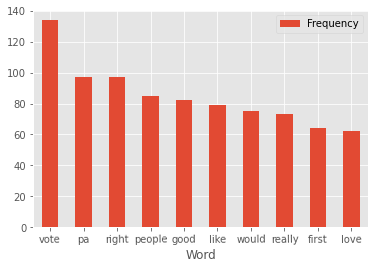

In [50]:
# For democrat
# Positive sentiment
top_N = 10

txt = pos_dm_df['Tweets'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

plt.style.use('ggplot')

rslt.plot.bar(rot=1)

All frequencies, including STOPWORDS:
     Word  Frequency
0   black        114
1  people         80
2    vote         75
3      pa         72
4       s         64
5    hate         63
6    know         60
7    like         55
8    fake         43
9     bad         36


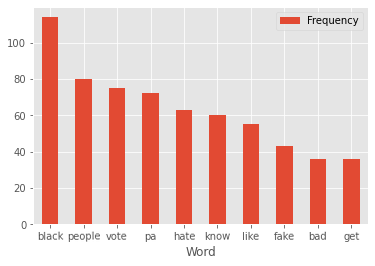

In [51]:
# For democrat
# Negative sentiment
top_N = 10

txt = neg_dm_df['Tweets'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

plt.style.use('ggplot')

rslt.plot.bar(rot=1)

All frequencies, including STOPWORDS:
        Word  Frequency
0         pa        126
1       like        102
2      right         98
3          s         93
4     really         78
5       vote         73
6      would         72
7       many         70
8  president         69
9       good         68


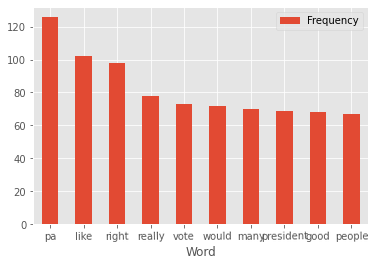

In [52]:
# For Republican
# Positive sentiment
top_N = 10

txt = pos_rp_df['Tweets'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

plt.style.use('ggplot')

rslt.plot.bar(rot=1)

All frequencies, including STOPWORDS:
     Word  Frequency
0       s        112
1      pa         74
2    vote         63
3  people         60
4    like         60
5   black         51
6    hate         44
7     one         43
8     bad         41
9     ers         39


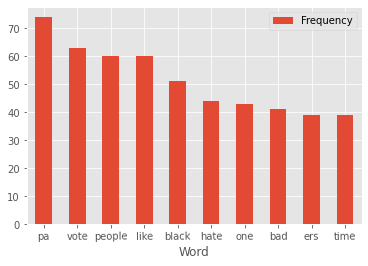

In [53]:
# For Republican
# Negative sentiment
top_N = 10

txt = neg_rp_df['Tweets'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

plt.style.use('ggplot')

rslt.plot.bar(rot=1)

**From visualizing most frequent words from both parties, we can conclude they are facing specifically same issues toward 2020 election. Black peoples and spreading hate may be critical for both. They are both using those words to fulfill their agenda.**